# Case Study on Correlation and Regression


A textile company regularly spent money on five advertising companies for their 
ads. (Dataset added along with)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\abhil\Downloads\Womens Clothing E-Commerce Reviews.csv")
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
data = pd.read_csv(r"C:\Users\abhil\Downloads\Womens Clothing E-Commerce Reviews.csv",index_col ='Unnamed: 0')
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.shape

(23486, 10)

In [5]:
data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
data = data[~data['Review Text'].isnull()]

In [9]:
## Checking missing values in the dataset
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [10]:
data.drop(['Title'],axis=1,inplace=True)

In [11]:
## Filling missing values in Division Name, Department Name and Class Name using their respective mode.

In [17]:
def fillna(data,col):
    return data[col].fillna(data[col].mode()[0],inplace=True)

In [18]:
missing_cols=["Division Name","Department Name","Class Name"]

In [19]:
for i in missing_cols:
    fillna(data,i)

In [20]:
data.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
handling outliers

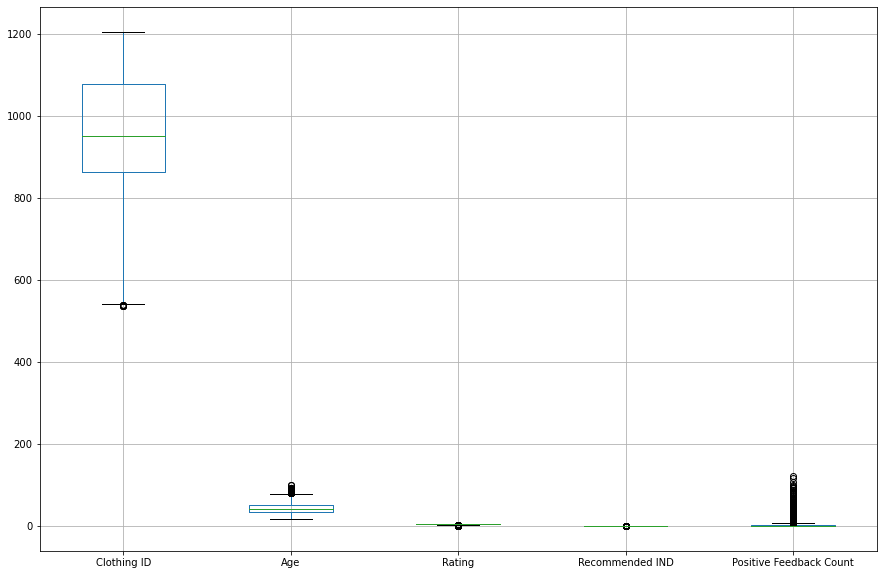

In [34]:
data.boxplot(figsize=(15,10))
plt.show()

handling outlier in clothing

In [24]:
Q1=np.percentile(data['Clothing ID'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Clothing ID'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Clothing ID'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

861.0
936.0
1078.0
535.5
1403.5


In [25]:
outlier = []
for x in data["Clothing ID"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[4, 89, 368, 368, 368, 126, 523, 329, 305, 127, 127, 127, 127, 127, 127, 149, 149, 204, 252, 252, 117, 117, 252, 252, 252, 252, 252, 252, 252, 117, 252, 252, 117, 245, 245, 2, 299, 80, 154, 154, 154, 158, 154, 154, 154, 154, 154, 154, 197, 59, 235, 59, 235, 230, 442, 442, 442, 411, 411, 411, 411, 411, 424, 485, 424, 115, 115, 434, 178, 225, 225, 225, 398, 225, 225, 431, 225, 34, 481, 481, 481, 481, 481, 481, 481, 371, 206, 321, 164, 164, 63, 160, 146, 146, 146, 146, 129, 129, 129, 129, 129, 418, 129, 418, 129, 129, 129, 517, 132, 132, 132, 132, 176, 248, 176, 248, 176, 176, 248, 176, 341, 341, 96, 14, 18, 282, 282, 282, 52, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 52, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 21, 491, 521, 486, 486, 20, 212, 429, 288, 302, 302, 505, 505, 374, 153, 505, 505, 374, 374, 374, 374, 285, 506, 412, 506, 506, 506, 506, 380, 380, 380, 380, 380, 512, 380, 422, 422, 422, 458, 468, 433, 4

In [27]:
ind_1 =data["Clothing ID"]<low_limit
data.loc[ind_1].index

Int64Index([   29,    43,    56,    59,    61,   138,   157,   171,   216,
              382,
            ...
            23425, 23435, 23438, 23449, 23457, 23461, 23463, 23469, 23471,
            23476],
           dtype='int64', length=1417)

In [28]:
data.drop(data.loc[ind_1].index,inplace =True)

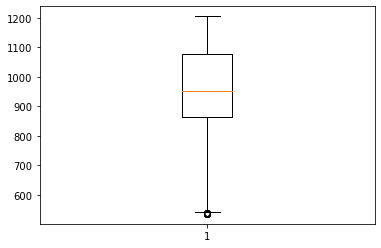

In [31]:
plt.boxplot(data["Clothing ID"])
plt.show()

handling outliers in age

In [35]:
Q1=np.percentile(data['Age'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Age'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Age'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

34.0
41.0
52.0
7.0
79.0


In [36]:
outlier = []
for x in data["Age"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[83, 83, 83, 80, 82, 82, 83, 82, 85, 80, 85, 83, 84, 83, 83, 80, 83, 80, 80, 83, 84, 82, 82, 83, 81, 90, 85, 94, 83, 83, 86, 80, 85, 82, 89, 80, 99, 83, 83, 83, 82, 81, 91, 83, 83, 80, 91, 83, 80, 84, 83, 99, 82, 82, 83, 87, 83, 90, 83, 82, 82, 92, 91, 83, 83, 82, 85, 83, 85, 84, 83, 89, 93, 81, 94, 94, 83, 83, 82, 83, 91, 83, 83, 83, 83, 83, 87, 83, 81, 81, 83, 83, 84, 83, 83, 84, 80, 87, 83, 86]


In [37]:
ind_1 =data["Age"]>upper_limit
data.loc[ind_1].index

Int64Index([   95,   234,   277,   628,   846,   958,  1006,  1036,  1188,
             1199,  1616,  2006,  2119,  2447,  3069,  3291,  3301,  3596,
             3810,  3820,  4418,  4968,  5368,  5371,  5469,  5901,  5909,
             6543,  6763,  6829,  6973,  7147,  7292,  7346,  8078,  8109,
             8327,  8718,  8877,  9085,  9161,  9437,  9513,  9815,  9896,
            10470, 10617, 10805, 11181, 11245, 11364, 11545, 11692, 11947,
            12003, 12581, 12612, 12631, 13022, 13383, 14404, 14997, 15802,
            16163, 16190, 16318, 16323, 16713, 16780, 17303, 17401, 17412,
            17578, 17611, 18036, 18563, 18894, 18963, 19179, 19257, 19304,
            19470, 20043, 20077, 20413, 20460, 21254, 21437, 21719, 22085,
            22129, 22228, 22421, 22435, 22436, 22552, 22640, 22716, 22773,
            23033],
           dtype='int64')

In [38]:
data.drop(data.loc[ind_1].index,inplace =True)

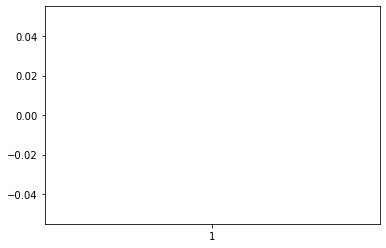

In [56]:
plt.boxplot(data["Age"])
plt.show()

In [41]:
#RATING
Q1=np.percentile(data['Rating'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Rating'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Rating'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


4.0
5.0
5.0
2.5
6.5


In [42]:
outlier = []
for x in data["Rating"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 

In [43]:
ind_1 =data["Rating"]>low_limit
data.loc[ind_1].index

Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,     9,
               10,
            ...
            23473, 23474, 23475, 23477, 23479, 23481, 23482, 23483, 23484,
            23485],
           dtype='int64', length=18890)

In [44]:
data.drop(data.loc[ind_1].index,inplace =True)

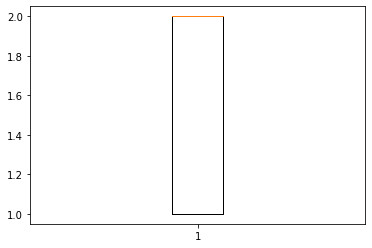

In [45]:
plt.boxplot(data["Rating"])
plt.show()

In [46]:
#recommended ind
Q1=np.percentile(data['Recommended IND'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Recommended IND'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Recommended IND'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


0.0
0.0
0.0
0.0
0.0


In [48]:
outlier = []
for x in data["Recommended IND"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [49]:
ind_1 =data["Rating"]>upper_limit
data.loc[ind_1].index

Int64Index([    5,    22,    26,    33,    68,    71,    77,    85,    88,
               96,
            ...
            23375, 23389, 23390, 23391, 23405, 23406, 23424, 23427, 23437,
            23478],
           dtype='int64', length=2234)

In [50]:
data.drop(data.loc[ind_1].index,inplace =True)

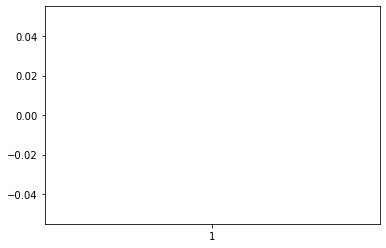

In [51]:
plt.boxplot(data["Recommended IND"])
plt.show()

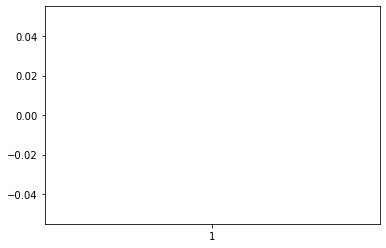

In [54]:
plt.boxplot(data['Positive Feedback Count'])
plt.show()